<a href="https://colab.research.google.com/github/Fatima-Usf/Netflix_data_analysis/blob/main/Netflix_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
#Loading our dataset
netflix_df = pd.read_csv("netflix_data.csv")

#Checking the first five rows of our dataset
#netflix_df.iloc[0:5]
#netflix_df[0:5]
netflix_df.head(5)


,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


# Filtering for movies
As we can see above, we have many types of Netfliw shows, for this study we are intersted in analyzing movies and their duration of watch.

In [6]:
netflix_df_movies_only = netflix_df[netflix_df["type"]=="Movie"] #Subseting the DataFrame for type "Movie"

netflix_movies_col_subset = netflix_df_movies_only[['title', 'country','genre', 'release_year', 'duration']] #Selecting only the columns of interest

netflix_movies_col_subset[0:5]

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


# Creating a scatter plot

In [9]:
import matplotlib.pyplot as plt

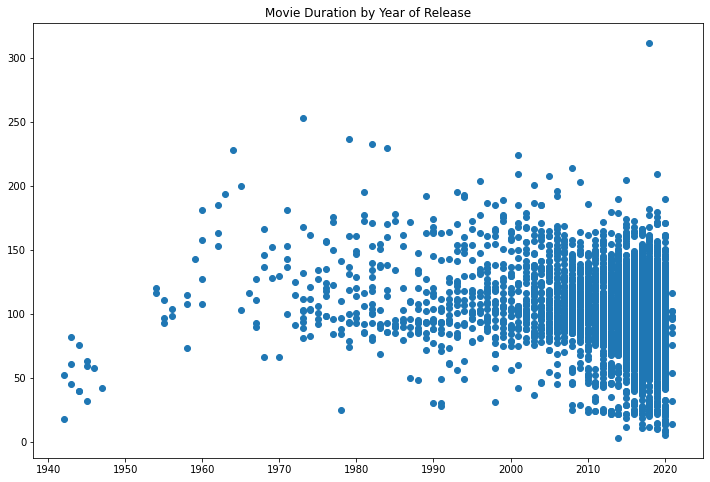

In [10]:
fig = plt.figure(figsize=(12,8)) #Creating a figure and increase the figure size

plt.scatter(netflix_movies_col_subset['release_year'],netflix_movies_col_subset['duration']) #Creating a scatter plot of duration versus year

plt.title("Movie Duration by Year of Release") #Setting a title

plt.show()